In [27]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [28]:
#change the time series to quarterly
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day15/train_ML_IOT.csv", index_col=0, parse_dates = ['DateTime'])
#df = pd.to_datetime(df.index).to_period("M")
df

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
...,...,...,...
2017-06-30 19:00:00,4,11,20170630194
2017-06-30 20:00:00,4,30,20170630204
2017-06-30 21:00:00,4,16,20170630214


In [42]:
###junction = 1

In [32]:
df1 = df[df['Junction']==1]['Vehicles']
downsampled  = df1.resample('M').sum() 
y_train = downsampled.iloc[:-4]
y_test = downsampled.iloc[-4:]

ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=264.457, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263.679, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=263.623, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=277.004, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=266.213, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=264.707, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=277.778, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.549 seconds


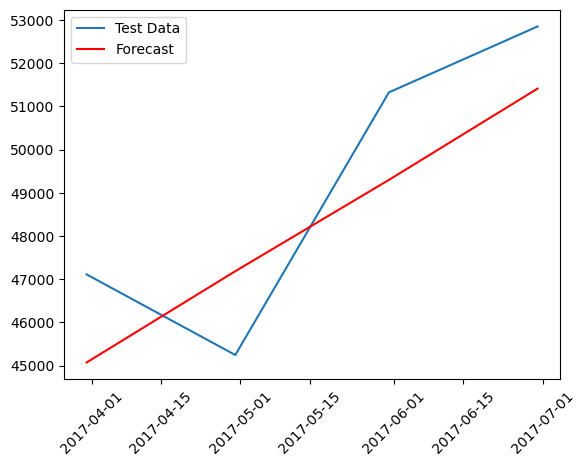

In [33]:
#ARIMA
model = auto_arima(y_train, trace=True, error_action='ignore',  suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index, columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.show()

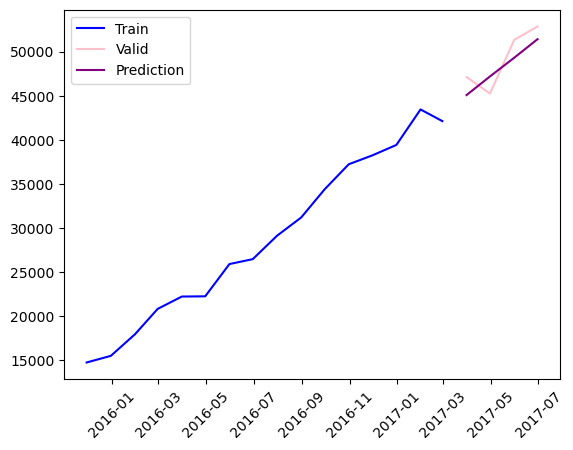

Test RMSE: 1877.837


In [34]:

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

SARMIA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=214.487, Time=0.00 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=212.655, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=251.791, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=216.582, Time=0.03 sec
 ARIMA(0,0,1)(1,1,1)[4] intercept   : AIC=214.905, Time=0.21 sec
 ARIMA(0,0,1)(0,1,2)[4] intercept   : AIC=212.918, Time=0.16 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=217.644, Time=0.17 sec
 ARIMA(0,0,1)(1,1,2)[4] intercept   : AIC=214.746, Time=0.21 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=210.820, Time=0.10 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=214.452, Time=0.05 sec
 ARIMA(0,0,0)(0,1,2)[4] intercept   : AIC=213.230, Time=0.05 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=215.932, Time=0.09 sec
 ARIMA(0,0,0)(1,1,2)[4] intercept   : AIC=215.217, Time

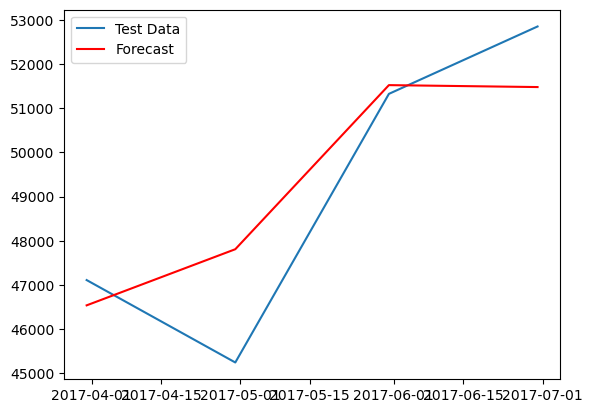

In [36]:
### SARMIA
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True,m=4)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

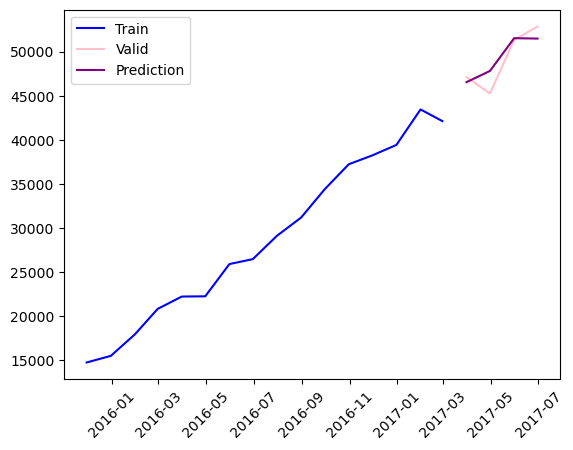

Test RMSE: 1485.348


In [38]:
#sarima
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

In [ ]:
###for junction = 2

In [39]:
df2 = df[df['Junction']==2]['Vehicles']
downsampled  = df2.resample('M').sum() 
y_train = downsampled.iloc[:-4]
y_test = downsampled.iloc[-4:]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=242.516, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=244.519, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=244.062, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=245.830, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.423 seconds


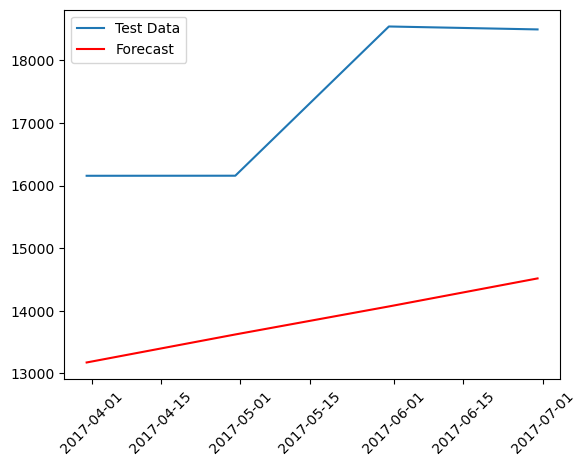

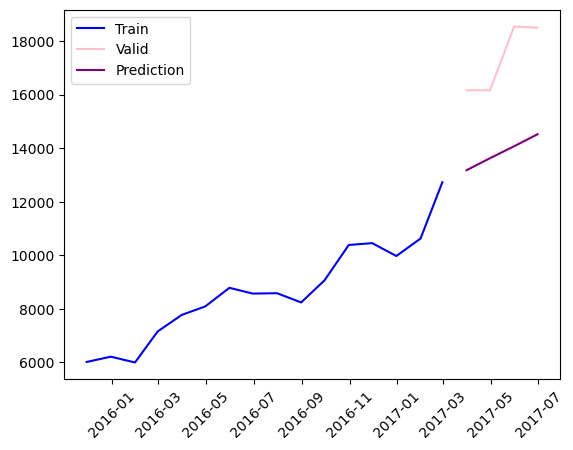

Test RMSE: 3575.852


In [40]:
#ARIMA
model = auto_arima(y_train, trace=True, error_action='ignore',  suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index, columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.show()

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=196.768, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=198.752, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=197.123, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=214.643, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=198.767, Time=0.02 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=198.764, Time=0.03 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=200.759, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=196.511, Time=0.06 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=199.001, Time=0.03 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=200.095, Time=0.09 sec
 ARIMA(2,0,0)(0,1,0)[4] intercept   : AIC=197.798, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=196.551, Time=0.15 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=195.203, Time=0.08 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=197.172, 

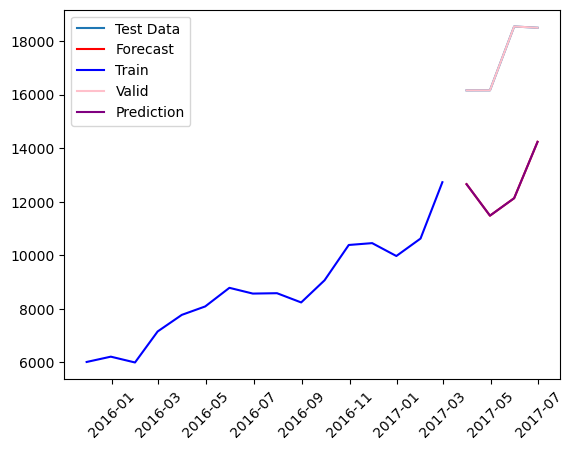

Test RMSE: 4834.068


In [41]:
### SARMIA
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True,m=4)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

In [43]:
###junction = 3

In [44]:
df3 = df[df['Junction']==2]['Vehicles']
downsampled  = df3.resample('M').sum() 
y_train = downsampled.iloc[:-4]
y_test = downsampled.iloc[-4:]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=242.516, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=244.519, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=244.062, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=245.830, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.423 seconds


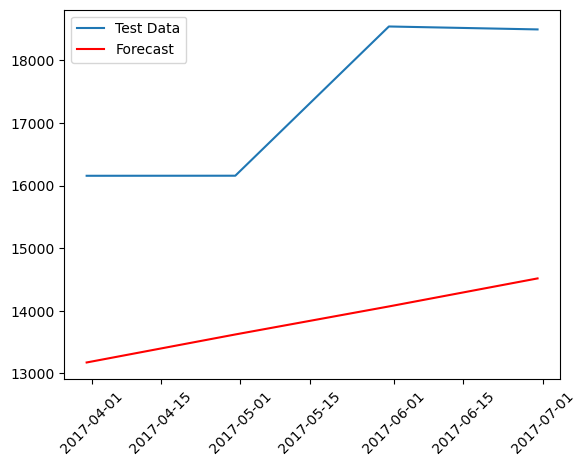

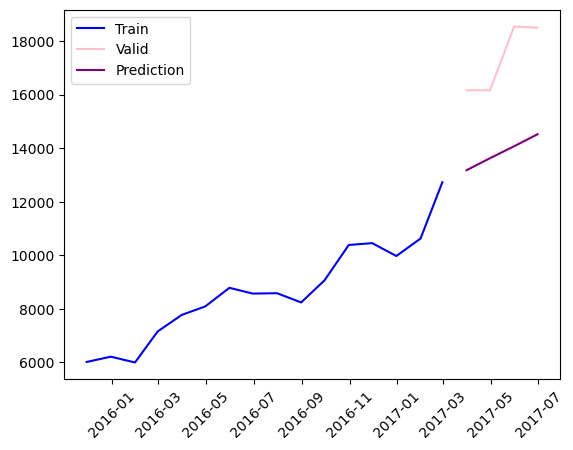

Test RMSE: 3575.852


In [45]:
#ARIMA
model = auto_arima(y_train, trace=True, error_action='ignore',  suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index, columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.show()

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=196.768, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=198.752, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=197.123, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=214.643, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=198.767, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=198.764, Time=0.02 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=200.759, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=196.511, Time=0.06 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=199.001, Time=0.05 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=200.095, Time=0.08 sec
 ARIMA(2,0,0)(0,1,0)[4] intercept   : AIC=197.798, Time=0.09 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=196.551, Time=0.17 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=195.203, Time=0.08 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=197.172, 

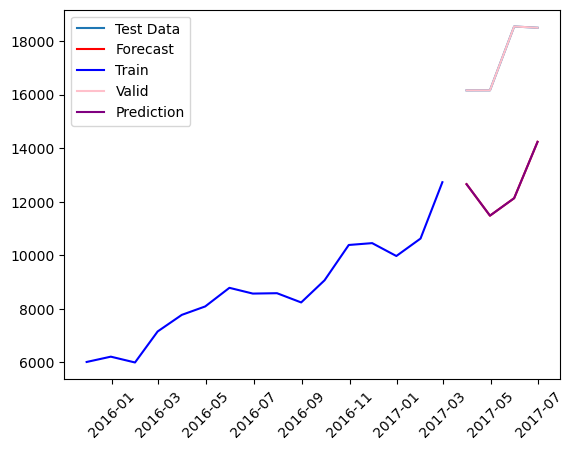

Test RMSE: 4834.068


In [46]:
### SARMIA
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True,m=4)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)